In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import re

In [3]:
os.getcwd()

'/home/mparadow/Desktop/KNR-Keyboard-Detection/code'

In [4]:
all_images = os.listdir(os.path.join("..", "data_generation", "data", "final_renders"))
images = [img for img in all_images if re.search("Image", img)]
masks = [img for img in all_images if re.search("Segmentation", img)]

In [5]:
images

['Image_20241210_2149010170.png']

In [6]:
def get_mask_for_image(img):
    return img.replace("Image", "Segmentation")

In [7]:
img_path = images[0]
img =  Image.open(os.path.join("..", "data_generation", "data", "final_renders", img_path))
mask = Image.open(os.path.join("..", "data_generation", "data", "final_renders", get_mask_for_image(img_path)))

In [8]:
mask_t = np.array(mask)
img_t = np.array(img)

In [9]:
keyboard_idxs = np.where(mask_t > 0)

In [10]:
mask_t.shape

(1080, 1920)

In [11]:
1080*1920

2073600

In [12]:
len(keyboard_idxs[0])

384937

In [13]:
x_left, x_right, y_up, y_down = np.min(keyboard_idxs[0]), np.max(keyboard_idxs[0]),  np.max(keyboard_idxs[1]), np.min(keyboard_idxs[1])

In [14]:
x_left, x_right, y_up, y_down

(np.int64(270), np.int64(988), np.int64(1378), np.int64(349))

In [15]:
y_left = np.mean(keyboard_idxs[1][np.where(keyboard_idxs[0] == x_left)])
y_right = np.mean(keyboard_idxs[1][np.where(keyboard_idxs[0] == x_right)])

x_up = np.mean(keyboard_idxs[0][np.where(keyboard_idxs[1] == y_up)])
x_down = np.mean(keyboard_idxs[0][np.where(keyboard_idxs[1] == y_down)])

In [16]:
points  = [
    (y_left,x_left),
    (y_up,x_up),
    (y_right,x_right),
    (y_down,x_down)
]

border = Polygon(points, closed=True, edgecolor='red', facecolor='none', linewidth=2)

In [17]:
points

[(np.float64(995.5), np.int64(270)),
 (np.int64(1378), np.float64(391.5)),
 (np.float64(948.0), np.int64(988)),
 (np.int64(349), np.float64(834.5))]

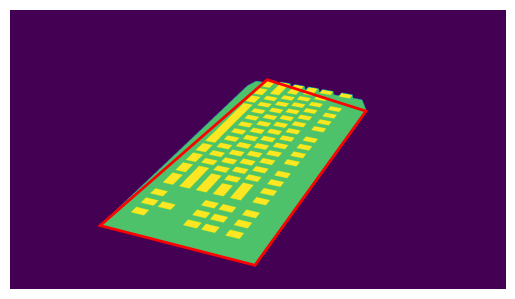

In [18]:
fig, ax = plt.subplots()

ax.imshow(mask)
ax.add_patch(border)
ax.set_xlim([0, mask.width])
ax.set_ylim([mask.height, 0])

plt.axis('off')  
plt.show()

In [20]:
from skimage import filters
from skimage.color import rgb2gray

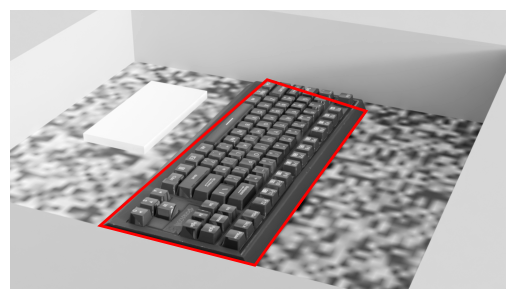

In [21]:
fig, ax = plt.subplots()

ax.imshow(rgb2gray(img_t[...,:3]), cmap=plt.cm.gray)
border2 = Polygon(points, closed=True, edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(border2)
ax.set_xlim([0, mask.width])
ax.set_ylim([mask.height, 0])

plt.axis('off')  
plt.show()

In [22]:
egdge_mask = filters.sobel(rgb2gray(img_t[...,:3]),mask_t)

[[ 995.5  270. ]
 [1378.   391.5]
 [ 948.   988. ]
 [ 349.   834.5]]


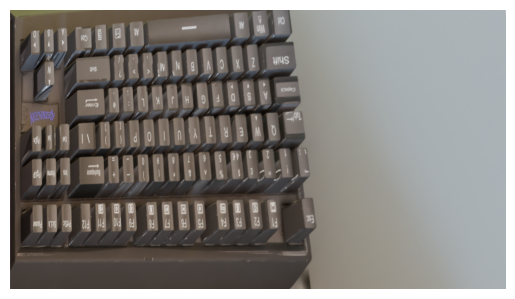

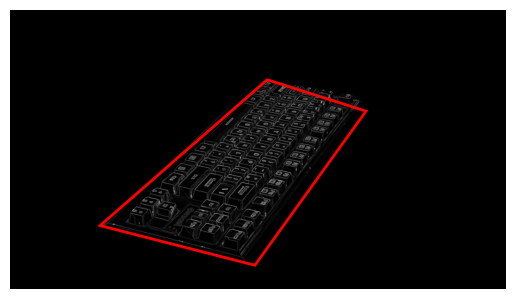

In [21]:
fig, ax = plt.subplots()

ax.imshow(egdge_mask, cmap = plt.cm.gray)
border3 = Polygon(points, closed=True, edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(border3)
ax.set_xlim([0, mask.width])
ax.set_ylim([mask.height, 0])

plt.axis('off')  
plt.show()

In [22]:
from skimage import measure

contours = measure.find_contours(egdge_mask, 0.04)

In [23]:
len(contours)

2880

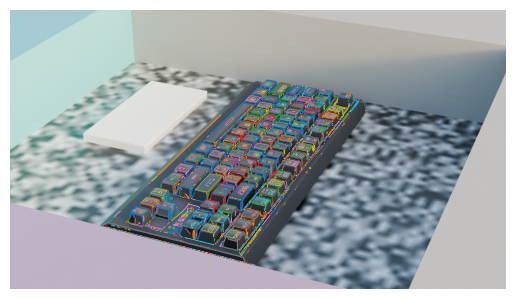

In [24]:
fig, ax = plt.subplots()
ax.imshow(img_t, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=0.4)

ax.set_xlim([0, mask.width])
ax.set_ylim([mask.height, 0])

plt.axis('off')  
plt.show()

In [25]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [26]:
contours[0]

array([[ 279.50673513, 1031.        ],
       [ 279.31481795, 1030.        ],
       [ 279.27475386, 1029.        ],
       [ 279.14111007, 1028.        ],
       [ 279.        , 1027.48404324],
       [ 278.89515618, 1027.        ],
       [ 278.67840793, 1026.        ],
       [ 278.5319944 , 1025.        ],
       [ 278.41422624, 1024.        ],
       [ 278.25810037, 1023.        ],
       [ 278.        , 1022.13137063],
       [ 277.96936141, 1022.        ],
       [ 277.77510198, 1021.        ],
       [ 277.63553017, 1020.        ],
       [ 277.48529648, 1019.        ],
       [ 277.23479026, 1018.        ],
       [ 277.        , 1017.29042905],
       [ 276.93996559, 1017.        ],
       [ 276.76064806, 1016.        ],
       [ 276.61136293, 1015.        ],
       [ 276.46991019, 1014.        ],
       [ 276.26346439, 1013.        ],
       [ 276.        , 1012.14794936],
       [ 275.96239781, 1012.        ],
       [ 275.78594675, 1011.        ],
       [ 275.70300181, 10

In [27]:
def typical_area(c, keyboard_area, typical):
    area = PolyArea(c[:,0], c[:,1])
    return area if abs(area/keyboard_area - typical) < 3e-2 else 0

In [28]:
keyboard_area = PolyArea(np.asarray(points)[:,0], np.asarray(points)[:,1])
typical = 23*pow(10,-5)

contours_sorted = list(contours)
contours_sorted.sort(key= lambda c: typical_area(c, keyboard_area,typical), reverse=True)

In [29]:
contours_sorted[:1]

[array([[726.        , 704.58273613],
        [725.38369749, 705.        ],
        [725.        , 705.10183161],
        ...,
        [726.        , 703.89214061],
        [726.77633008, 704.        ],
        [726.        , 704.58273613]], shape=(1203, 2))]

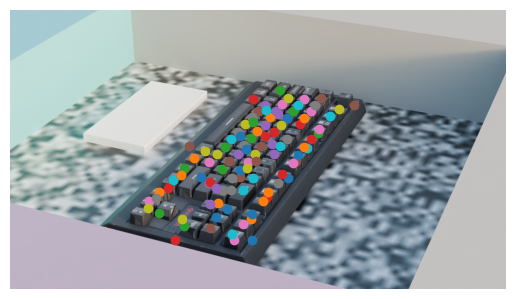

In [30]:
fig, ax = plt.subplots()
ax.imshow(img_t, cmap=plt.cm.gray)

keyboard_area = PolyArea(np.asarray(points)[:,0], np.asarray(points)[:,1])
typical = 10*pow(10,-3)

i = 0
contour = contours_sorted[i]
area = typical_area(contour, keyboard_area, typical)

while area > 0 and i <102:
    #ax.plot(contour[:, 1], contour[:, 0], linewidth=0.4)
    center = (np.sum(contour[:,1])/len(contour),np.sum(contour[:,0])/len(contour))
    ax.scatter(center[0], center[1])
    i += 1
    contour = contours_sorted[i]
    area = typical_area(contour, keyboard_area, typical)

ax.set_xlim([0, mask.width])
ax.set_ylim([mask.height, 0])

plt.axis('off')  
plt.show()

In [31]:
from skimage import io, color, filters, measure, morphology

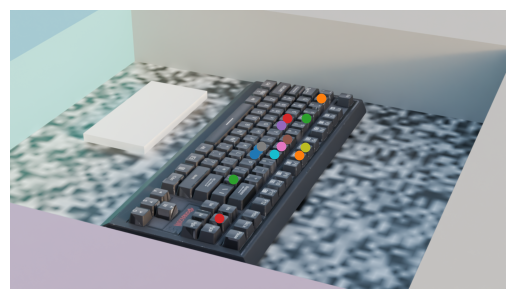

In [32]:
thresh = egdge_mask < filters.threshold_otsu(egdge_mask)
thresh = morphology.remove_small_objects(thresh, min_size=500)
label_image = measure.label(thresh, connectivity=2)

regions = measure.regionprops(label_image)

fig, ax = plt.subplots()
ax.imshow(img_t)

for region in regions:
    center = (np.sum(region.coords[:,1])/len(region.coords),np.sum(region.coords[:,0])/len(region.coords))
    ax.scatter(center[0], center[1])

plt.axis('off')  
plt.show()

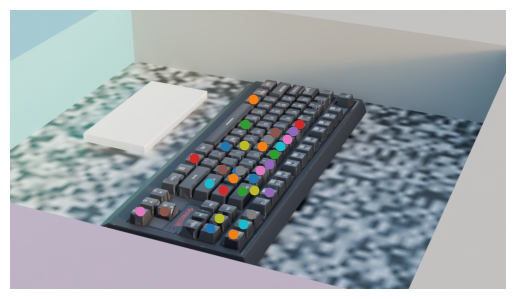

In [33]:
thresh = egdge_mask < filters.threshold_local(egdge_mask, block_size=9, method='gaussian', offset=0, mode='reflect', param=None, cval=0)
thresh = morphology.remove_small_objects(thresh, min_size=600)
label_image = measure.label(thresh, connectivity=2)

regions = measure.regionprops(label_image)

fig, ax = plt.subplots()
ax.imshow(img_t)

for region in regions:
    center = (np.sum(region.coords[:,1])/len(region.coords),np.sum(region.coords[:,0])/len(region.coords))
    ax.scatter(center[0], center[1])

plt.axis('off')  
plt.show()

Lets put this into function

In [34]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def typical_area(c, keyboard_area):
    area = PolyArea(c[:,0], c[:,1])
    return area #if 0.05 < area/keyboard_area and area/keyboard_area < 0.07 else -1

def find_some_keys(img: np.ndarray, mask : np.ndarray, ax):
    keyboard_area_id = measure.find_contours(mask)[0]
    keyboard_area = PolyArea(keyboard_area_id[:,0], keyboard_area_id[:,1])
    egdge_mask = filters.sobel(rgb2gray(img[...,:3]),mask)
    thresh = egdge_mask < filters.threshold_otsu(egdge_mask)
    thresh = (thresh + 1)%2
    
    contours = measure.find_contours(thresh)
    contours_sorted = list(contours)
    contours_sorted.sort(key= lambda c: typical_area(c, keyboard_area), reverse=True)
    centers = []
    areas = []

    ax.imshow(thresh, cmap = plt.cm.gray)
    i = 0
    contour = contours_sorted[i]
    area = typical_area(contour, keyboard_area)

    while area > 0 and i <80:
        #ax.plot(contour[:, 1], contour[:, 0], linewidth=0.4)
        areas.append(PolyArea(contour[:,0], contour[:,1])/keyboard_area)
        center = (np.sum(contour[:,1])/len(contour),np.sum(contour[:,0])/len(contour))
        centers.append(center)
        ax.scatter(center[0], center[1], color = "red", s = 3)
        i += 1
        contour = contours_sorted[i]
    
    #ax.hist(areas, bins=50)
    ax.axis("off")
    ax.set_xlim([0, mask.shape[1]])
    ax.set_ylim([mask.shape[0], 0])   

    print("Found", len(contours), "candidates from which", len(centers), "were accepted.", "Max area:", np.max(areas), "Keyboard area", keyboard_area)
    return centers, ax

Found 2597 candidates from which 80 were accepted. Max area: 0.01872890272981926 Keyboard area 384512.64891958237


IndexError: list index out of range

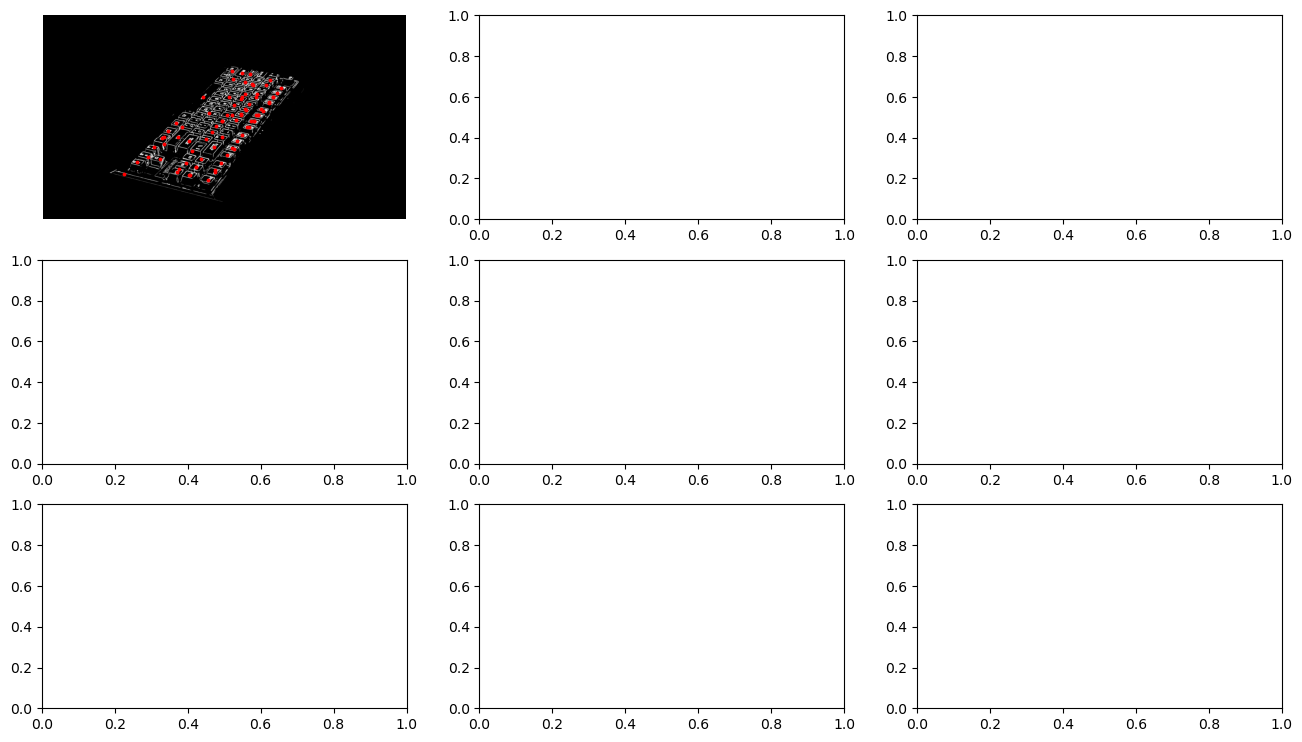

In [48]:
fig, axes =  plt.subplots(3,3, figsize = (16,9))

axes = axes.flatten()

for i in range(len(axes)):
    img_path = images[i]
    img =  Image.open(os.path.join("..", "data_generation", "data", "final_renders", img_path))
    mask = Image.open(os.path.join("..", "data_generation", "data", "final_renders", get_mask_for_image(img_path)))
    find_some_keys(np.array(img), np.array(mask), axes[i])

plt.tight_layout()
plt.show()


Found 2597 candidates from which 80 were accepted. Max area: 0.01872890272981926 Keyboard area 384512.64891958237


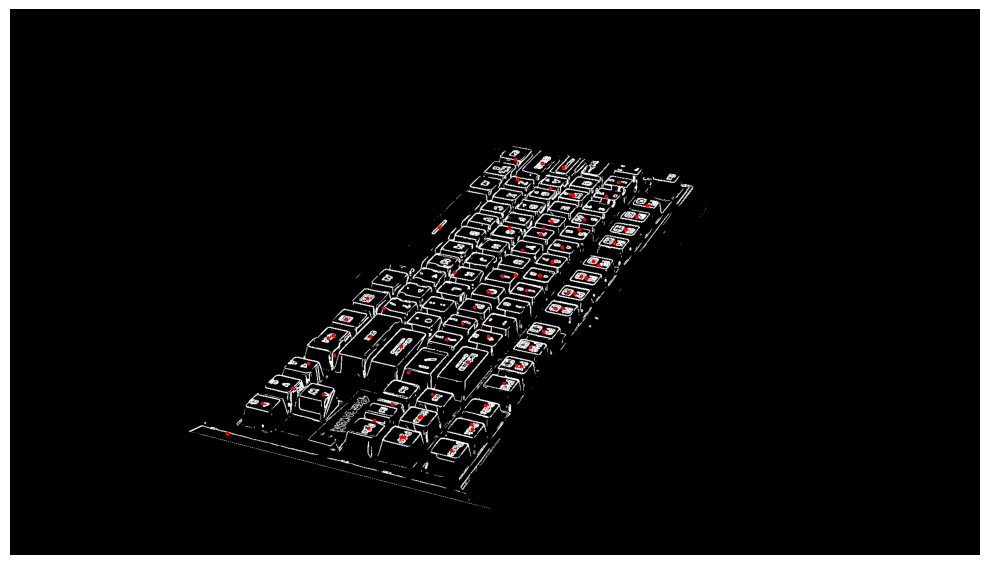

In [55]:
img_path = "Image_20241210_2149010170.png"


fig, axes =  plt.subplots(1,1, figsize = (10,10))

img =  Image.open(os.path.join("..", "data_generation", "results", "final_renders", img_path))
mask = Image.open(os.path.join("..", "data_generation", "results", "final_renders", get_mask_for_image(img_path)))
img_t = np.array(img)
mask_t = np.array(mask)
centers, _ = find_some_keys(np.array(img), np.array(mask), axes)

plt.tight_layout()
plt.axis("off")
plt.show()

In [56]:
centers = np.asarray(centers)
centers

array([[ 878.21561457,  519.62100493],
       [ 999.07638073,  526.48237368],
       [ 835.59389039,  761.47124888],
       [1109.43044983,  364.82595156],
       [1054.43418014,  433.59006928],
       [ 737.84869267,  591.01264466],
       [1178.9414542 ,  369.40840415],
       [ 946.71524548,  646.6369509 ],
       [ 808.89336493,  805.95734597],
       [1126.06148282,  434.37884268],
       [ 947.67782427,  560.32426778],
       [1115.52356021,  561.07068063],
       [1047.25128205,  526.35128205],
       [1073.47004608,  500.19124424],
       [1140.87939698,  531.01758794],
       [1196.09045226,  462.59547739],
       [ 863.28756477,  653.09326425],
       [1216.62427746,  435.30346821],
       [ 946.74855491,  557.5433526 ],
       [1021.26300578,  556.21387283],
       [1115.88011696,  561.38596491],
       [1139.57692308,  530.71005917],
       [ 973.24556213,  527.95266272],
       [1049.62707182,  525.70718232],
       [1072.1196319 ,  497.52147239],
       [1030.12572534,  6

In [57]:
len(centers)

80

In [58]:
keyboard_layout = np.array([
    ["Esc", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12"],
    ["`~", "1", "2", "3", "4", "5", "6", "7", "8", "9", "0", "-", "=", "Backspace"],
    ["Tab", "Q", "W", "E", "R", "T", "Y", "U", "I", "O", "P", "[", "]", "\\"],
    ["Caps Lock", "A", "S", "D", "F", "G", "H", "J", "K", "L", ";", "'", "Enter"],
    ["Shift", "Z", "X", "C", "V", "B", "N", "M", ",", ".", "/", "Shift"],
    ["Ctrl", "Win", "Alt", "Spacebar", "Alt", "Win", "Menu", "Ctrl"],
    ["Insert", "Home", "Page Up", "Delete", "End", "Page Down", "↑", "←", "↓", "→"]
], dtype=object)

# ESC, LEFT_ARROW center

In [59]:
esc = [np.max(centers[:,0]), np.max(centers[:,1])]
left_arr = [np.min(centers[:,0]), np.min(centers[:,1])]

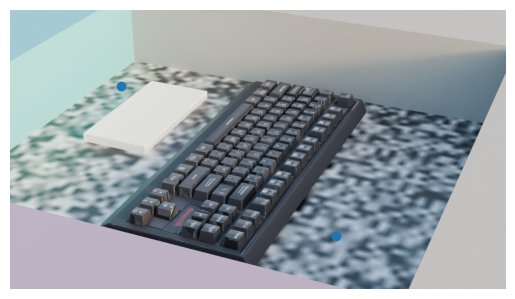

In [74]:
fig, ax = plt.subplots()
ax.imshow(np.array(img))

ax.scatter([esc[0], left_arr[0]], [esc[1], left_arr[1]])

plt.axis('off')  
plt.show()

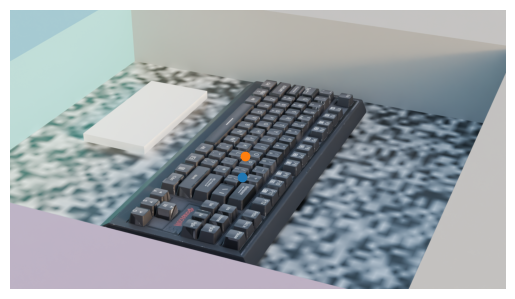

In [61]:
regions = measure.regionprops(mask_t)

fig, ax = plt.subplots()
ax.imshow(img_t)

for region in regions:
    center = (np.sum(region.coords[:,1])/len(region.coords),np.sum(region.coords[:,0])/len(region.coords))
    ax.scatter(center[0], center[1])

plt.axis('off')  
plt.show()

In [62]:
normalised_centers = np.transpose(np.asarray([(centers[:,0] - left_arr[0]) / (esc[0] - left_arr[0]), (centers[:,1] - left_arr[1]) / (esc[1] - left_arr[1])]))

In [63]:
normalised_centers

array([[0.53990696, 0.38836772],
       [0.68554748, 0.40026269],
       [0.48854661, 0.80764291],
       [0.81852715, 0.1200127 ],
       [0.75225515, 0.23922321],
       [0.37076098, 0.51213333],
       [0.90228981, 0.12795691],
       [0.62245088, 0.60856446],
       [0.45637175, 0.88476468],
       [0.838568  , 0.24059064],
       [0.62361082, 0.4589315 ],
       [0.82586952, 0.4602255 ],
       [0.74359956, 0.40003543],
       [0.77519388, 0.354684  ],
       [0.85642399, 0.40812501],
       [0.92295483, 0.28950741],
       [0.52191825, 0.61975722],
       [0.94769865, 0.24219358],
       [0.62249102, 0.45411047],
       [0.71228297, 0.45180566],
       [0.82629918, 0.46077208],
       [0.85485448, 0.40759187],
       [0.65442064, 0.40281161],
       [0.74646245, 0.39891881],
       [0.7735666 , 0.35005564],
       [0.72296279, 0.6456182 ],
       [0.53256244, 1.        ],
       [0.92230246, 0.28747533],
       [0.15408431, 0.78639731],
       [0.77244383, 0.21242791],
       [0.

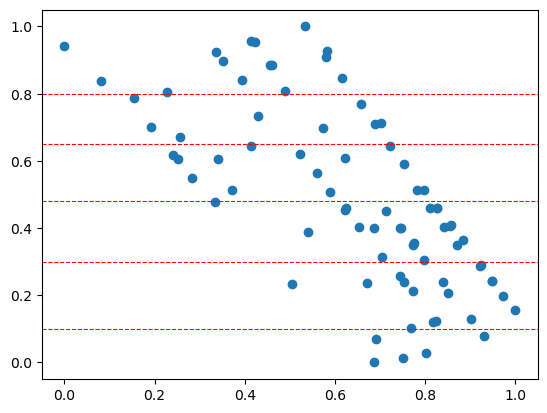

In [64]:
plt.scatter(normalised_centers[:,0], normalised_centers[:,1])
horizontal_lines = [0.10, 0.3,0.48, 0.65, 0.8]
for h in horizontal_lines:
    plt.axhline(y=h, color='red', linestyle='--', linewidth=0.8)


In [65]:
normalised_centers

array([[0.53990696, 0.38836772],
       [0.68554748, 0.40026269],
       [0.48854661, 0.80764291],
       [0.81852715, 0.1200127 ],
       [0.75225515, 0.23922321],
       [0.37076098, 0.51213333],
       [0.90228981, 0.12795691],
       [0.62245088, 0.60856446],
       [0.45637175, 0.88476468],
       [0.838568  , 0.24059064],
       [0.62361082, 0.4589315 ],
       [0.82586952, 0.4602255 ],
       [0.74359956, 0.40003543],
       [0.77519388, 0.354684  ],
       [0.85642399, 0.40812501],
       [0.92295483, 0.28950741],
       [0.52191825, 0.61975722],
       [0.94769865, 0.24219358],
       [0.62249102, 0.45411047],
       [0.71228297, 0.45180566],
       [0.82629918, 0.46077208],
       [0.85485448, 0.40759187],
       [0.65442064, 0.40281161],
       [0.74646245, 0.39891881],
       [0.7735666 , 0.35005564],
       [0.72296279, 0.6456182 ],
       [0.53256244, 1.        ],
       [0.92230246, 0.28747533],
       [0.15408431, 0.78639731],
       [0.77244383, 0.21242791],
       [0.

In [66]:
sorted_centers = pd.DataFrame(normalised_centers, columns=["0","1"]).sort_values(by="1", ascending=False)
sorted_centers

0         1
26  0.532562  1.000000
41  0.413223  0.956308
53  0.422320  0.954620
61  0.000000  0.941529
59  0.582505  0.927731
..       ...       ...
38  0.931489  0.079519
49  0.692084  0.069250
63  0.801243  0.027231
51  0.751258  0.014639
67  0.686168  0.000000

[80 rows x 2 columns]

In [67]:
sorted_centers.head(10)

0         1
26  0.532562  1.000000
41  0.413223  0.956308
53  0.422320  0.954620
61  0.000000  0.941529
59  0.582505  0.927731
62  0.336473  0.924322
74  0.580120  0.910193
54  0.350956  0.896658
8   0.456372  0.884765
57  0.461290  0.884103

In [68]:
sorted_centers.drop(0, axis= 0 , inplace=True)

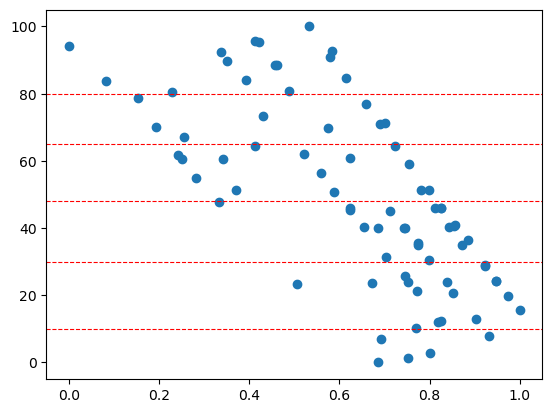

In [69]:
k = 100
plt.scatter(sorted_centers.iloc[:,0], sorted_centers.iloc[:,1]*k)
horizontal_lines = [0.10*k, 0.3*k,0.48*k, 0.65*k, 0.8*k]
for h in horizontal_lines:
    plt.axhline(y=h, color='red', linestyle='--', linewidth=0.8)


In [23]:
from sklearn.cluster import HDBSCAN
import seaborn as sns

71    999.064032
54    750.376292
37    561.847806
0       0.956405
72    999.460718
         ...    
36    374.019657
10      0.614606
53    561.760100
70    748.827852
87    997.816916
Name: 1, Length: 88, dtype: float64


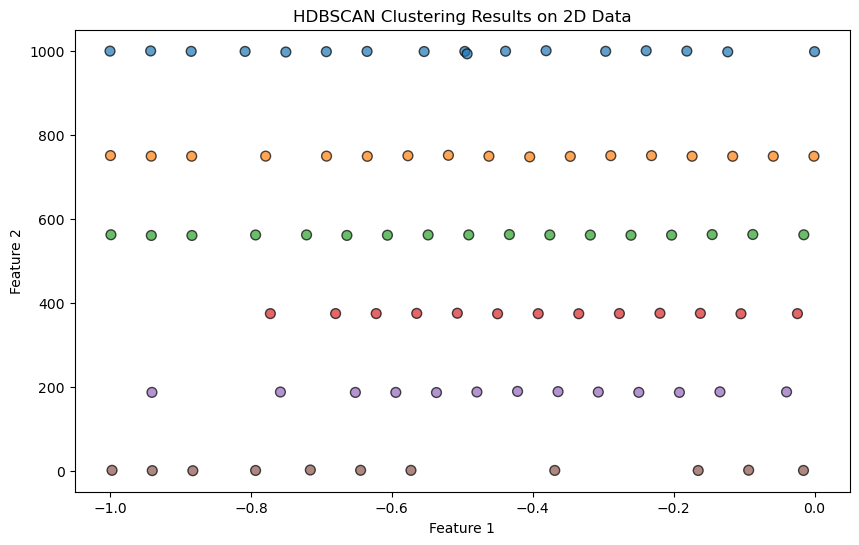

In [119]:
X = sorted_centers.copy()
X["1"] = X["1"]*1000

print(X["1"])

m = HDBSCAN(min_cluster_size=6, )
m.fit(X)

labels = m.labels_

unique_labels = np.unique(labels)
palette = sns.color_palette('tab10', n_colors=len(unique_labels))
palette.append((0.5, 0.5, 0.5))  # Grey for noise

# Assign colors to points
colors = [palette[label] if label >= 0 else palette[-1] for label in labels]

# Plot the data with clustering results
plt.figure(figsize=(10, 6))
plt.scatter(-X.iloc[:, 0], X.iloc[:, 1], c=colors, s=50, edgecolor='k', alpha=0.7)
plt.title("HDBSCAN Clustering Results on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [22]:
from sklearn.linear_model import LinearRegression

In [53]:
from sklearn.linear_model import LinearRegression
sorted_centers["rows"] = m.labels_

coefs = []

for row in np.unique(sorted_centers["rows"]):
    cluster_data = sorted_centers.loc[sorted_centers["rows"] == row, ["0", "1"]]
    X_t = cluster_data["0"].values.reshape(-1, 1)  
    y_t = cluster_data["1"].values
    lr = LinearRegression()
    lr.fit(X_t,y_t)
    coefs.append((lr.coef_,lr.intercept_))


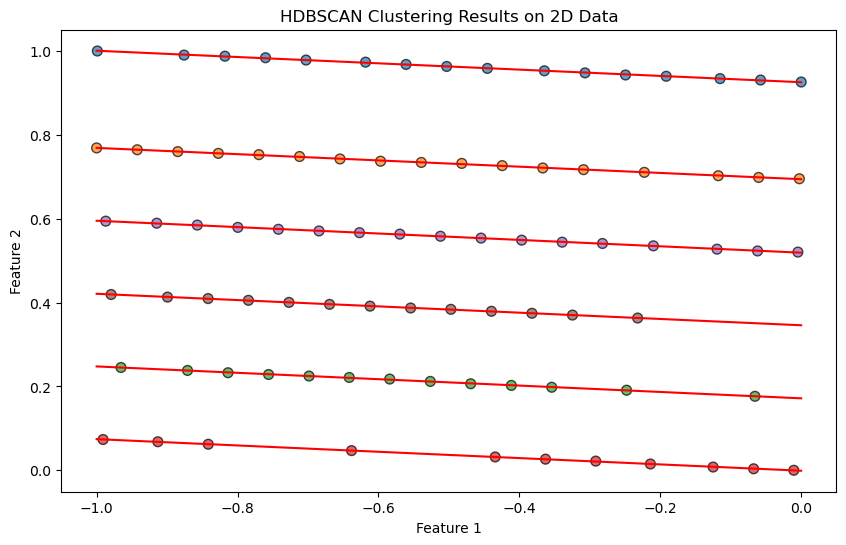

In [54]:
unique_labels = np.unique(labels)
palette = sns.color_palette('tab10', n_colors=len(unique_labels))
palette.append((0.5, 0.5, 0.5))  # Grey for noise

# Assign colors to points
colors = [palette[label] if label >= 0 else palette[-1] for label in labels]

# Plot the data with clustering results
fig,ax = plt.subplots(figsize=(10, 6))
ax.scatter(-X.iloc[:, 0], X.iloc[:, 1]/1000, c=colors, s=50, edgecolor='k', alpha=0.7)

for (a,b) in coefs:
    x = np.linspace(-1,0,100)
    y = -a*x+b
    ax.plot(x,y,color = "red")

plt.title("HDBSCAN Clustering Results on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [55]:
print(np.std(centers[:,0]), np.std(centers[:,1]))

167.45774568880918 58.02744651594707


In [56]:
sorted_centers.head()

0         1  rows
87  0.998989  1.000000     0
86  0.875914  0.990305     0
85  0.817904  0.987619     0
84  0.760257  0.983996     0
83  0.702808  0.978453     0

In [129]:
keyboard_layout = [
    ["Esc", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "PrtScr", "ScrLck", "Pause"],
    ["`~", "1", "2", "3", "4", "5", "6", "7", "8", "9", "0", "-", "=", "Backspace", "Insert", "Home", "PageUp"],
    ["Tab", "Q", "W", "E", "R", "T", "Y", "U", "I", "O", "P", "[", "]", "\\", "Delete", "End", "PageDown"],
    ["Caps Lock", "A", "S", "D", "F", "G", "H", "J", "K", "L", ";", "'", "Enter"],
    ["Shift1", "Z", "X", "C", "V", "B", "N", "M", ",", ".", "/", "Shift", "↑"],
    ["Ctrl1", "Win1", "Alt1", "Spacebar", "Alt", "Win", "Menu", "Ctrl", "←", "↓", "→"],
    #["Insert", "Home", "Page Up", "Delete", "End", "Page Down", "↑", "←", "↓", "→"]
]

In [21]:
import math

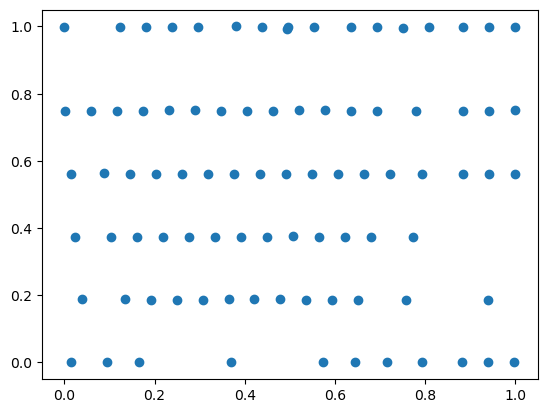

In [123]:
centers, _ = find_some_keys(np.array(img_t), np.array(mask_t))

mask_region = measure.regionprops(mask_t)
angle = mask_region[0].orientation

keyboard_center = (np.sum(mask_region[0].coords[:,1])/len(mask_region[0].coords),np.sum(mask_region[0].coords[:,0])/len(mask_region[0].coords))
normalised_centers = np.transpose(np.asarray([centers[:,0] - keyboard_center[0], keyboard_center[1] - centers[:,1]]))
sorted_centers = pd.DataFrame(normalised_centers, columns=["0","1"]).sort_values(by="1", ascending=False)

X = sorted_centers.copy()

rot_angle = np.pi + np.pi/2 - angle
rotation_matrix = np.matrix([[np.cos(rot_angle), -np.sin(rot_angle)], [np.sin(rot_angle), np.cos(rot_angle)]])

X = X.apply(lambda x: np.matmul(rotation_matrix,x), axis= 1)
sorted_centers = pd.DataFrame(X.tolist(), columns=["0", "1"])
sorted_centers["0"] = (sorted_centers["0"] - np.min(sorted_centers["0"])) / (np.max(sorted_centers["0"]) - np.min(sorted_centers["0"]))
sorted_centers["1"] = (sorted_centers["1"] - np.min(sorted_centers["1"])) / (np.max(sorted_centers["1"]) - np.min(sorted_centers["1"]))

sorted_centers = sorted_centers.sort_values(by=["1"], ascending=False)
plt.scatter(sorted_centers["0"], sorted_centers["1"])

In [124]:

sorted_centers

0         1
82  0.381042  1.000000
84  0.238960  0.999902
72  0.942291  0.999461
85  0.181260  0.999139
71  1.000000  0.999064
..       ...       ...
3   0.793371  0.000623
10  0.015703  0.000615
8   0.165135  0.000557
1   0.940017  0.000212
2   0.882444  0.000000

[88 rows x 2 columns]

for i in range(sorted_centers.shape[0]):
    center = sorted_centers.
    if abs(center_prvs[0] - center[0]) < 0.04 and abs(center_prvs[1] - center[1]) < 0.02:
        print( "space",center_prvs[0] - center[0])
        center_prvs = center
        continue
    print(center[1])
    if center[1] < current_thrsd:
        current_thrsd = next(th_iter)
        keyboard_row+=1
        keyboard_column = 0
        if keyboard_row > 5:
            break
    letters_dict[keyboard_layout[keyboard_row][keyboard_column]] = center
    keyboard_column +=1
    center_prvs = center

    

In [140]:
horizontal_lines = [0, 0.10, 0.3,0.5, 0.65, 0.85]
letters_dict = {}

th_iter = reversed(horizontal_lines)
current_thrsd = next(th_iter)

keyboard_row = 0
keyboard_column = 0

center_prvs = [0,0]
thrd_prev= 1

while True:
    row = sorted_centers.loc[ (sorted_centers["1"] >= current_thrsd) & (sorted_centers["1"] < thrd_prev) , :]
    row = row.sort_values(by="0", ascending=True)
    print(row)
    for j in range(len(row)):
        center = row.iloc[j,:]
        if abs(center_prvs[0] - center[0]) < 0.04 and abs(center_prvs[1] - center[1]) < 0.02:
            print( "space",center_prvs[0] - center[0])
            center_prvs = center
            continue
        print(keyboard_row, keyboard_column)
        letters_dict[keyboard_layout[keyboard_row][keyboard_column]] = center
        keyboard_column +=1
        center_prvs = center


    keyboard_row+=1
    keyboard_column = 0
    if keyboard_row > 5:
        break
    thrd_prev = current_thrsd
    current_thrsd = next(th_iter)    

           0         1
87  0.000000  0.997817
86  0.123204  0.997336
85  0.181260  0.999139
84  0.238960  0.999902
83  0.296477  0.998582
81  0.438582  0.998809
78  0.493111  0.992606
80  0.496358  0.998282
79  0.554135  0.998041
77  0.635143  0.998333
76  0.692919  0.997738
75  0.750417  0.996920
74  0.808243  0.998311
73  0.884777  0.998479
72  0.942291  0.999461
71  1.000000  0.999064
0 0
0 1
0 2
0 3
0 4
0 5
0 6
space -0.0032471229517995748
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
           0         1
70  0.000876  0.748828
69  0.058579  0.748785
68  0.116200  0.748657
67  0.173790  0.748816
66  0.231402  0.750219
65  0.289205  0.750114
64  0.346688  0.748416
63  0.404302  0.747249
62  0.462167  0.748827
61  0.519671  0.751027
60  0.577133  0.749952
59  0.634792  0.748547
58  0.692671  0.749008
57  0.779054  0.749025
56  0.884092  0.748848
55  0.941514  0.749006
54  0.999316  0.750376
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
           0         1
53 

/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_29946/3972353195.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(center_prvs[0] - center[0]) < 0.04 and abs(center_prvs[1] - center[1]) < 0.02:
/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_29946/3972353195.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print( "space",center_prvs[0] - center[0])
/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_29946/3972353195.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent

In [141]:
letters_dict

{'Esc': 0    0.000000
 1    0.997817
 Name: 87, dtype: float64,
 'F1': 0    0.123204
 1    0.997336
 Name: 86, dtype: float64,
 'F2': 0    0.181260
 1    0.999139
 Name: 85, dtype: float64,
 'F3': 0    0.238960
 1    0.999902
 Name: 84, dtype: float64,
 'F4': 0    0.296477
 1    0.998582
 Name: 83, dtype: float64,
 'F5': 0    0.438582
 1    0.998809
 Name: 81, dtype: float64,
 'F6': 0    0.493111
 1    0.992606
 Name: 78, dtype: float64,
 'F7': 0    0.554135
 1    0.998041
 Name: 79, dtype: float64,
 'F8': 0    0.635143
 1    0.998333
 Name: 77, dtype: float64,
 'F9': 0    0.692919
 1    0.997738
 Name: 76, dtype: float64,
 'F10': 0    0.750417
 1    0.996920
 Name: 75, dtype: float64,
 'F11': 0    0.808243
 1    0.998311
 Name: 74, dtype: float64,
 'F12': 0    0.884777
 1    0.998479
 Name: 73, dtype: float64,
 'PrtScr': 0    0.942291
 1    0.999461
 Name: 72, dtype: float64,
 'ScrLck': 0    1.000000
 1    0.999064
 Name: 71, dtype: float64,
 '`~': 0    0.000876
 1    0.748828
 Name: 

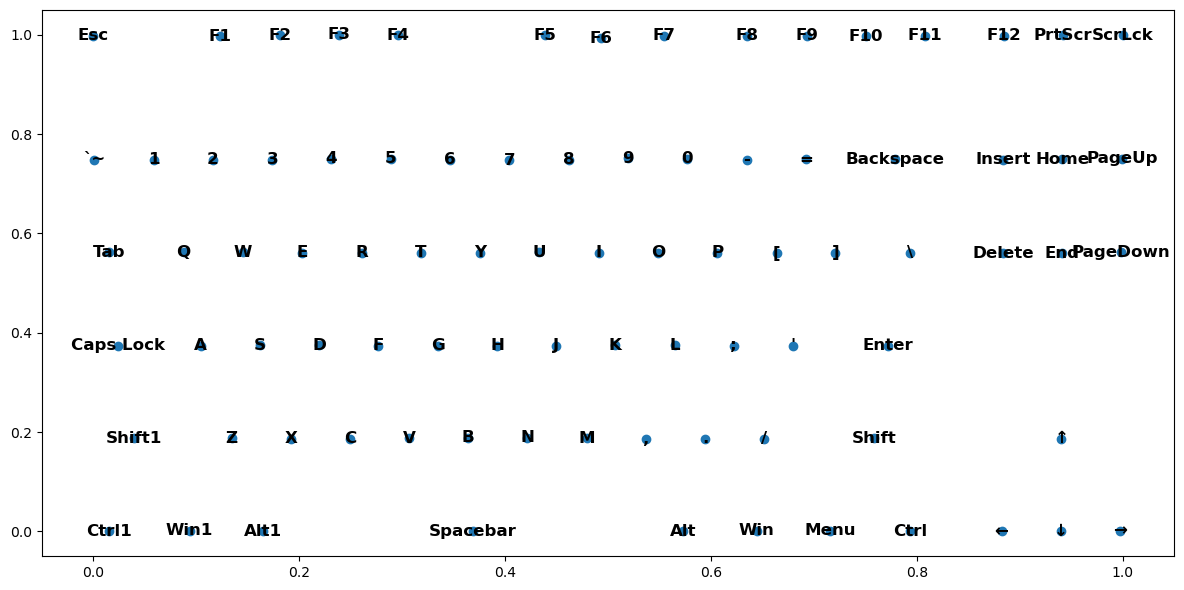

In [142]:
keys = list(letters_dict.keys())
values = list(letters_dict.values())

# Extract x and y values from the list of values (assuming each value is a 2-element list)
x_values = [val.iloc[0] for val in values]
y_values = [val.iloc[1] for val in values]

# Create the plot
plt.figure(figsize=(12, 6))

# Scatter plot of the values
plt.scatter(x_values, y_values)

# Add text for each key in the dictionary at its respective (x, y) position
for i, key in enumerate(keys):
    plt.text(x_values[i], y_values[i], key, ha='center', va='center', fontweight='bold', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
from sklearn.decomposition import PCA

In [17]:
def find_some_keys(img: np.ndarray, mask : np.ndarray):
    egdge_mask = filters.sobel(rgb2gray(img[...,:3]),mask)

    thresh = egdge_mask < filters.threshold_otsu(egdge_mask)
    thresh = morphology.remove_small_objects(thresh, min_size=400)
    label_image = measure.label(thresh, connectivity=2)

    regions = measure.regionprops(label_image)

    centers = []
    for region in regions:
        center = (np.sum(region.coords[:,1])/len(region.coords),np.sum(region.coords[:,0])/len(region.coords))
        centers.append(center)
  
    centers = np.asarray(centers)
    return centers, None

In [34]:
def find_rows(img, mask, axes):
    mask_region = measure.regionprops(mask)
    angle = mask_region[0].orientation

    centers, _ = find_some_keys(np.array(img), np.array(mask))
    x_std,y_std = np.std(centers[:,0]), np.std(centers[:,1])

    #multiplier = (1,1000) if x_std > y_std else (1000,1)

    multiplier  = (pow(y_std/x_std,10), pow(x_std/y_std,10))

    #lower_right = [np.max(centers[:,0]), np.max(centers[:,1])]
    #upper_left = [np.min(centers[:,0]), np.min(centers[:,1])]
    #lower_right = [img.shape[0], img.shape[1]]
    upper_left = (np.sum(mask_region[0].coords[:,1])/len(mask_region[0].coords),np.sum(mask_region[0].coords[:,0])/len(mask_region[0].coords))

    #normalised_centers = np.transpose(np.asarray([(centers[:,0] - upper_left[0]) / (lower_right[0] - upper_left[0]), (centers[:,1] - upper_left[1]) / (lower_right[1] - upper_left[1])]))
    normalised_centers = np.transpose(np.asarray([centers[:,0] - upper_left[0], centers[:,1] - upper_left[1]]))
    sorted_centers = pd.DataFrame(normalised_centers, columns=["0","1"]).sort_values(by="1", ascending=False)

    pca= PCA(n_components=2)
    pca.fit(sorted_centers)
    print(pca.singular_values_)

    multiplier = pca.singular_values_
    multiplier = (1,1000)

    X = sorted_centers.copy()

    rot_angle = -np.pi/2 + angle
    rotation_matrix = np.matrix([[np.cos(rot_angle), -np.sin(rot_angle)], [np.sin(rot_angle), np.cos(rot_angle)]])

    X = X.apply(lambda x: np.matmul(rotation_matrix,x), axis= 1)
    X = pd.DataFrame(X.tolist(), columns=["0", "1"])
    X["0"] = X["0"]*multiplier[0]
    X["1"] = X["1"]*multiplier[1]

    m = HDBSCAN(min_cluster_size=6,max_cluster_size=20)
    m.fit(X)

    labels = m.labels_

    sorted_centers["rows"] = labels

    coefs = []

    for row in np.unique(sorted_centers["rows"]):
        if row == -1:
            continue
        cluster_data = sorted_centers.loc[sorted_centers["rows"] == row, ["0", "1"]]
        X_t = cluster_data["0"].values.reshape(-1, 1)  
        y_t = cluster_data["1"].values
        lr = LinearRegression()
        lr.fit(X_t,y_t)
        coefs.append((lr.coef_,lr.intercept_))

    unique_labels = np.unique(labels)
    palette = sns.color_palette('tab10', n_colors=len(unique_labels))
    palette.append((0.5, 0.5, 0.5))  # Grey for noise

    colors = [palette[label] if label >= 0 else palette[-1] for label in labels]

    axes.scatter(sorted_centers["0"], sorted_centers["1"], c=colors, s=50, edgecolor='k', alpha=0.7)
    axes.set_title(angle)

    for (a,b) in coefs:
        x = np.linspace(sorted_centers["0"].min(),sorted_centers["0"].max(),100)
        y = a*x+b
        axes.plot(x,y,color = "red")

    return coefs,axes

In [ ]:
img_path = "Image_20241129_1523370170.png"

fig, axes =  plt.subplots(1,1, figsize = (10,10))

img =  Image.open(os.path.join("results", "final_renders", img_path))
mask = Image.open(os.path.join("results", "final_renders", get_mask_for_image(img_path)))
img_t = np.array(img)
mask_t = np.array(mask)
coefs, _ = find_rows(np.array(img), np.array(mask), axes)

plt.tight_layout()
plt.show()

[1459.29750186  621.94062078]
[1502.33072406  747.48960299]
[1737.24650783  747.98066925]
[2084.87781649  664.33219401]
[2154.24361455 1001.6979988 ]
[2109.14952623  696.70567494]
[1694.47961382  357.7930374 ]
[1585.22649142  403.55210937]
[2687.10792324  791.65510864]
[1830.02905539  553.91964024]
[1212.45119482  290.85540347]
[1845.81504884  597.81188748]
[1503.0681713   697.39710272]
[1724.77286072  627.89021801]
[465.64448611 148.55836721]
[1415.70183759  862.77039561]
[2045.97955396  843.71173001]
[797.62534029 147.40458676]
[650.40923281 170.29328011]
[1341.31449301  315.94591161]


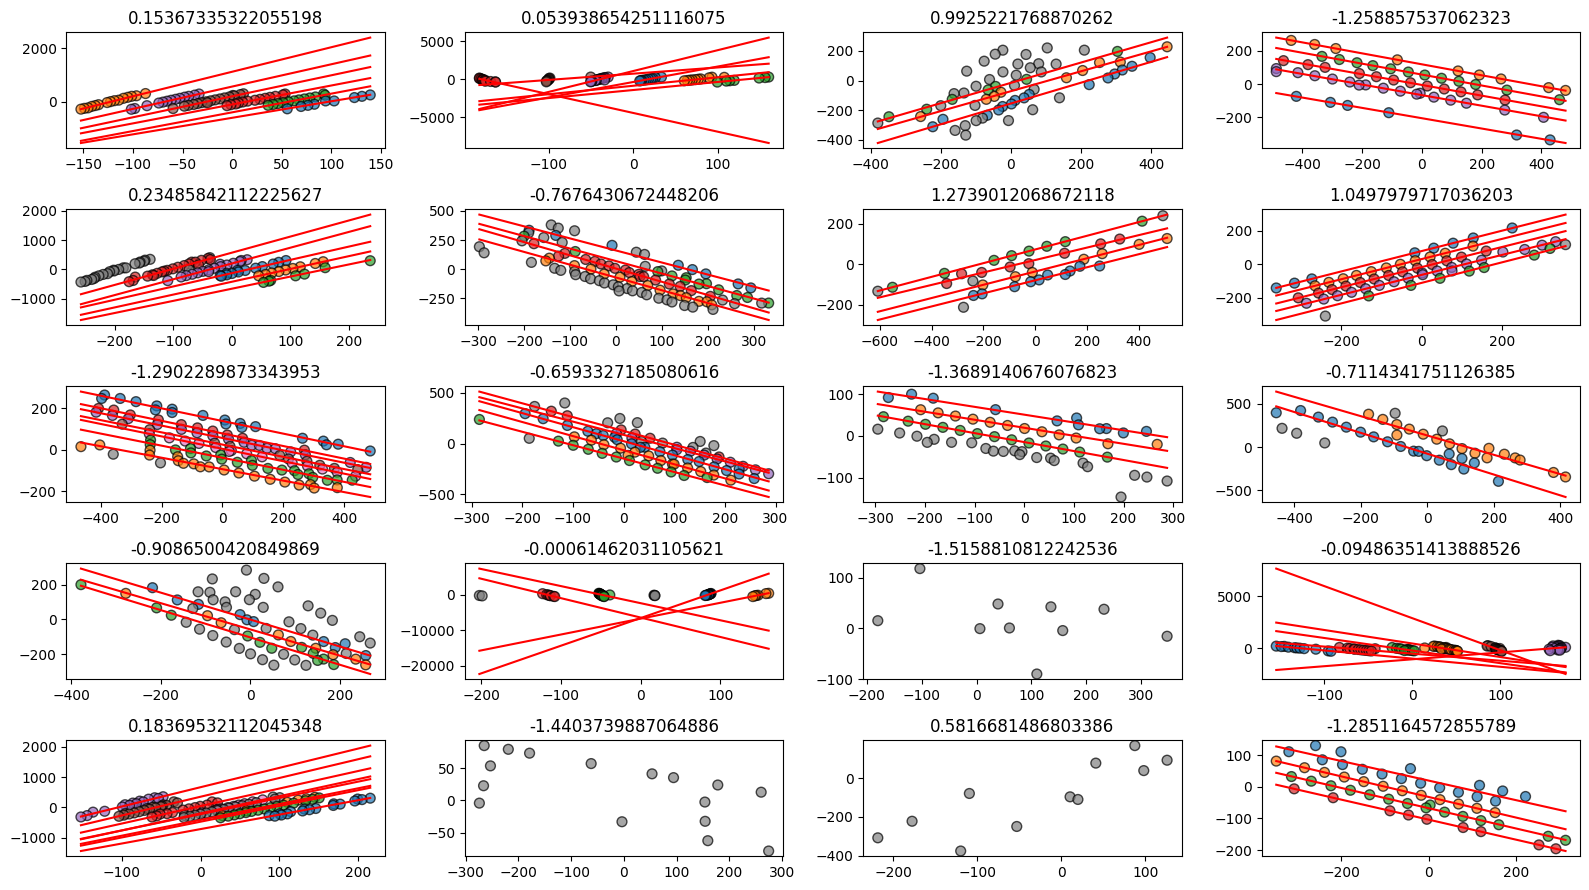

In [35]:
fig, axes =  plt.subplots(5,4, figsize = (16,9))

axes = axes.flatten()

for i in range(len(axes)):
    img_path = images[i]
    img =  Image.open(os.path.join("data", "final_renders", img_path))
    mask = Image.open(os.path.join("data", "final_renders", get_mask_for_image(img_path)))
    find_rows(np.array(img), np.array(mask), axes[i])

plt.tight_layout()
plt.show()

In [41]:
def find_rows_img(img, mask, axes):
    mask_region = measure.regionprops(mask)
    angle = mask_region[0].orientation

    centers, _ = find_some_keys(np.array(img), np.array(mask))

    keyboard_center = (np.sum(mask_region[0].coords[:,1])/len(mask_region[0].coords),np.sum(mask_region[0].coords[:,0])/len(mask_region[0].coords))
    normalised_centers = np.transpose(np.asarray([centers[:,0] - keyboard_center[0], keyboard_center[1] - centers[:,1]]))
    sorted_centers = pd.DataFrame(normalised_centers, columns=["0","1"]).sort_values(by="1", ascending=False)

    multiplier = (1,1000)

    X = sorted_centers.copy()

    rot_angle = np.pi/2 - angle
    rotation_matrix = np.matrix([[np.cos(rot_angle), -np.sin(rot_angle)], [np.sin(rot_angle), np.cos(rot_angle)]])

    X = X.apply(lambda x: np.matmul(rotation_matrix,x), axis= 1)
    X = pd.DataFrame(X.tolist(), columns=["0", "1"])
    X["0"] = X["0"]*multiplier[0]
    X["1"] = X["1"]*multiplier[1]

    m = HDBSCAN(min_cluster_size=6,max_cluster_size=20)
    m.fit(X)

    labels = m.labels_

    sorted_centers["rows"] = labels

    coefs = []

    sorted_centers["0"] = sorted_centers["0"] + keyboard_center[0]
    sorted_centers["1"] = -sorted_centers["1"] + keyboard_center[1]

    for row in np.unique(sorted_centers["rows"]):
        if row == -1:
            continue
        cluster_data = sorted_centers.loc[sorted_centers["rows"] == row, ["0", "1"]]
        X_t = cluster_data["0"].values.reshape(-1, 1)  
        y_t = cluster_data["1"].values
        lr = LinearRegression()
        lr.fit(X_t,y_t)
        coefs.append((lr.coef_,lr.intercept_, row))

    #unique_labels = np.unique(labels)
    #palette = sns.color_palette('tab10', n_colors=len(unique_labels))
    #palette.append((0.5, 0.5, 0.5))  # Grey for noise

    #colors = [palette[label] if label >= 0 else palette[-1] for label in labels]


    axes.imshow(img)
    #axes.scatter(centers[:,0], centers[:,1], c=colors, s=50, edgecolor='k', alpha=0.7)

    i = 0
    for (a,b,row) in coefs:
        x = np.linspace(0, img.shape[1], 100)
        y = a*x+b
        axes.plot(x,y,color = "red")
        i+=1

    axes.set_xlim([0, img.shape[1]])
    axes.set_ylim([img.shape[0], 0])   

    return coefs,axes

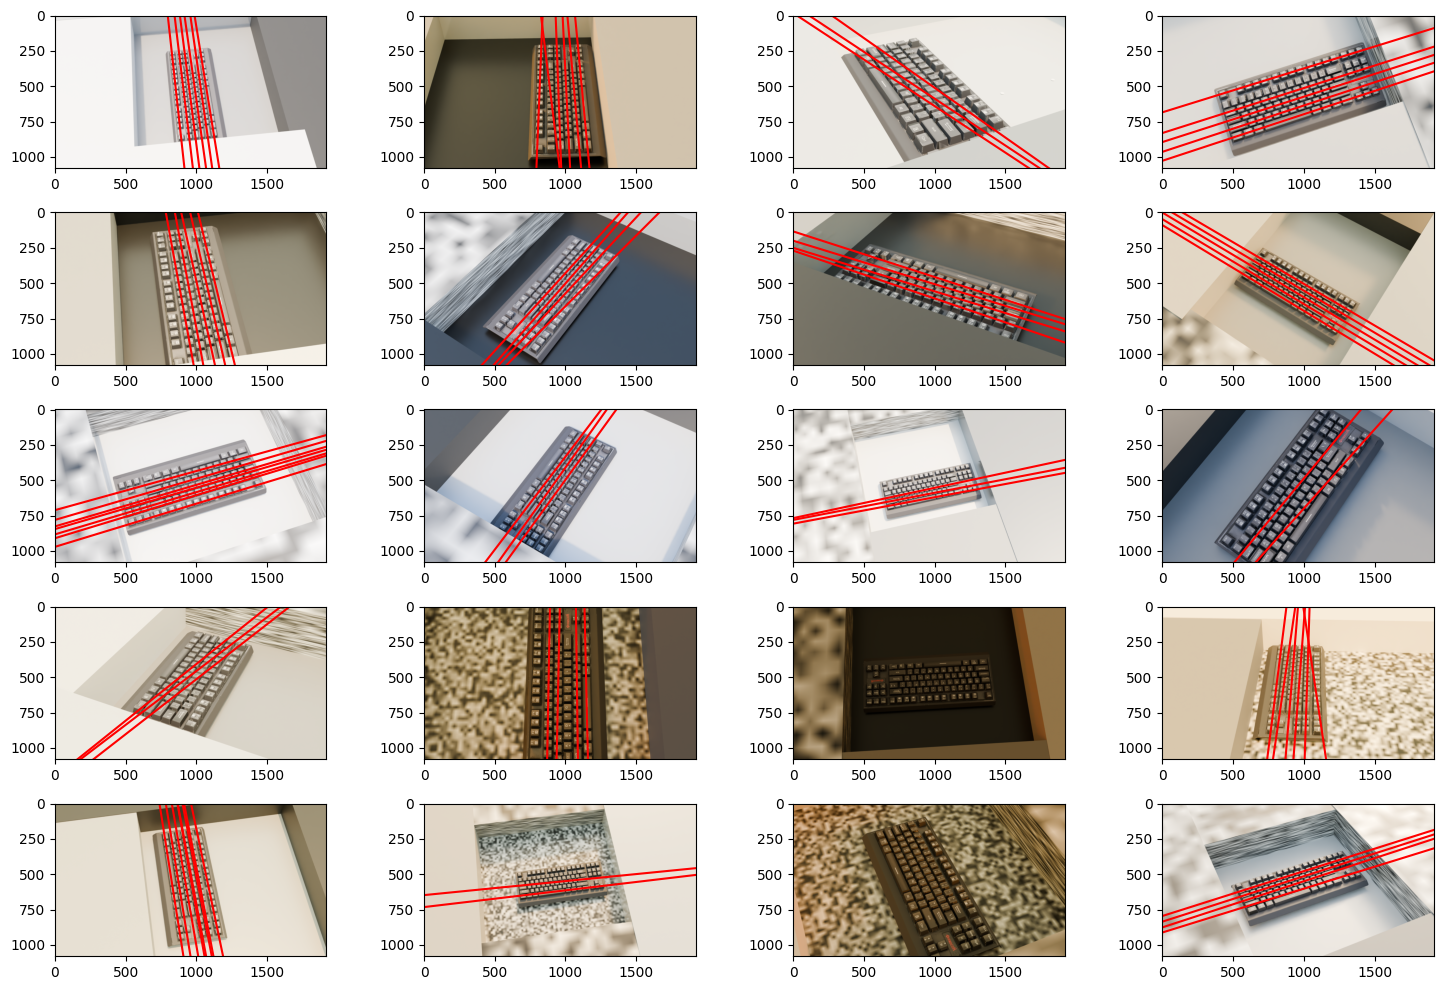

In [42]:
fig, axes =  plt.subplots(5,4, figsize = (15,10))

axes = axes.flatten()

for i in range(len(axes)):
    img_path = images[i]
    img =  Image.open(os.path.join("data", "final_renders", img_path))
    mask = Image.open(os.path.join("data", "final_renders", get_mask_for_image(img_path)))
    find_rows_img(np.array(img), np.array(mask), axes[i])

plt.tight_layout()
plt.show()

# Another approach

In [232]:
from sklearn.cluster import HDBSCAN
from sklearn.linear_model import LinearRegression
import seaborn as sns

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def typical_area(c, keyboard_area):
    area = PolyArea(c[:,0], c[:,1])
    return area #if 0.006 < area/keyboard_area and area/keyboard_area < 0.4 else -1

def find_some_keys(img: np.ndarray, mask : np.ndarray):
    keyboard_area_id = measure.find_contours(mask)[0]
    keyboard_area = PolyArea(keyboard_area_id[:,0], keyboard_area_id[:,1])
    egdge_mask = filters.sobel(rgb2gray(img[...,:3]),mask)
    thresh = egdge_mask < filters.threshold_otsu(egdge_mask)
    thresh = (thresh + 1)%2
    
    contours = measure.find_contours(thresh)
    contours_sorted = list(contours)
    contours_sorted.sort(key= lambda c: typical_area(c, keyboard_area), reverse=True)
    centers = []
    areas = []

    i = 0
    contour = contours_sorted[i]
    area = typical_area(contour, keyboard_area)

    while area > 0 and i <80:
        areas.append(PolyArea(contour[:,0], contour[:,1])/keyboard_area)
        center = (np.sum(contour[:,1])/len(contour),np.sum(contour[:,0])/len(contour))
        centers.append(center)
        i += 1
        contour = contours_sorted[i]

    print("Found", len(contours), "candidates from which", len(centers), "were accepted.", "Max area:", np.max(areas), "Keyboard area", keyboard_area)
    return np.asarray(centers), ax

def find_rows_img(img, mask, axes):
    mask_region = measure.regionprops(mask)
    angle = mask_region[0].orientation

    centers, _ = find_some_keys(np.array(img), np.array(mask))

    keyboard_center = (np.sum(mask_region[0].coords[:,1])/len(mask_region[0].coords),np.sum(mask_region[0].coords[:,0])/len(mask_region[0].coords))
    normalised_centers = np.transpose(np.asarray([centers[:,0] - keyboard_center[0], keyboard_center[1] - centers[:,1]]))
    sorted_centers = pd.DataFrame(normalised_centers, columns=["0","1"]).sort_values(by="1", ascending=False)

    multiplier = (1,10000)

    X = sorted_centers.copy()

    rot_angle = np.pi/2 - angle
    rotation_matrix = np.matrix([[np.cos(rot_angle), -np.sin(rot_angle)], [np.sin(rot_angle), np.cos(rot_angle)]])

    X = X.apply(lambda x: np.matmul(rotation_matrix,x), axis= 1)
    X = pd.DataFrame(X.tolist(), columns=["0", "1"])
    X["0"] = X["0"]*multiplier[0]
    X["1"] = X["1"]*multiplier[1]

    m = HDBSCAN(min_cluster_size=6)
    m.fit(X)

    labels = m.labels_

    sorted_centers["rows"] = labels

    coefs = []

    sorted_centers["0"] = sorted_centers["0"] + keyboard_center[0]
    sorted_centers["1"] = -sorted_centers["1"] + keyboard_center[1]

    for row in np.unique(sorted_centers["rows"]):
        if row == -1:
            continue
        cluster_data = sorted_centers.loc[sorted_centers["rows"] == row, ["0", "1"]]
        X_t = cluster_data["0"].values.reshape(-1, 1)  
        y_t = cluster_data["1"].values
        lr = LinearRegression()
        lr.fit(X_t,y_t)
        coefs.append((lr.coef_,lr.intercept_, row))

    unique_labels = np.unique(labels)
    palette = sns.color_palette('tab10', n_colors=len(unique_labels))
    palette.append((0.5, 0.5, 0.5))  # Grey for noise

    colors = [palette[label] if label >= 0 else palette[-1] for label in labels]
    
    axes.imshow(img)
    axes.scatter(sorted_centers.iloc[:,0], sorted_centers.iloc[:,1], c=colors, s=10, edgecolor='k', alpha=0.7)

    i = 0
    for (a,b,row) in coefs:
        x = np.linspace(0, img.shape[1], 100)
        y = a*x+b
        #axes.plot(x,y,color = "red")
        i+=1

    axes.set_xlim([0, img.shape[1]])
    axes.set_ylim([img.shape[0], 0])   

    return coefs,axes

Found 1993 candidates from which 80 were accepted. Max area: 0.4478769736298717 Keyboard area 223984.5
Found 1608 candidates from which 80 were accepted. Max area: 0.040250150206412684 Keyboard area 386967.5
Found 2476 candidates from which 80 were accepted. Max area: 0.2969589020040415 Keyboard area 553007.5
Found 3490 candidates from which 80 were accepted. Max area: 0.07486098438939805 Keyboard area 550747.5
Found 2688 candidates from which 80 were accepted. Max area: 0.3221455263951235 Keyboard area 513319.25
Found 3479 candidates from which 80 were accepted. Max area: 0.3112459074899736 Keyboard area 395081.5
Found 2826 candidates from which 80 were accepted. Max area: 0.13204462856363325 Keyboard area 428828.5
Found 2281 candidates from which 80 were accepted. Max area: 0.06587770774075302 Keyboard area 275806.5
Found 3724 candidates from which 80 were accepted. Max area: 0.33660364892116423 Keyboard area 420754.5
Found 4174 candidates from which 80 were accepted. Max area: 0.268

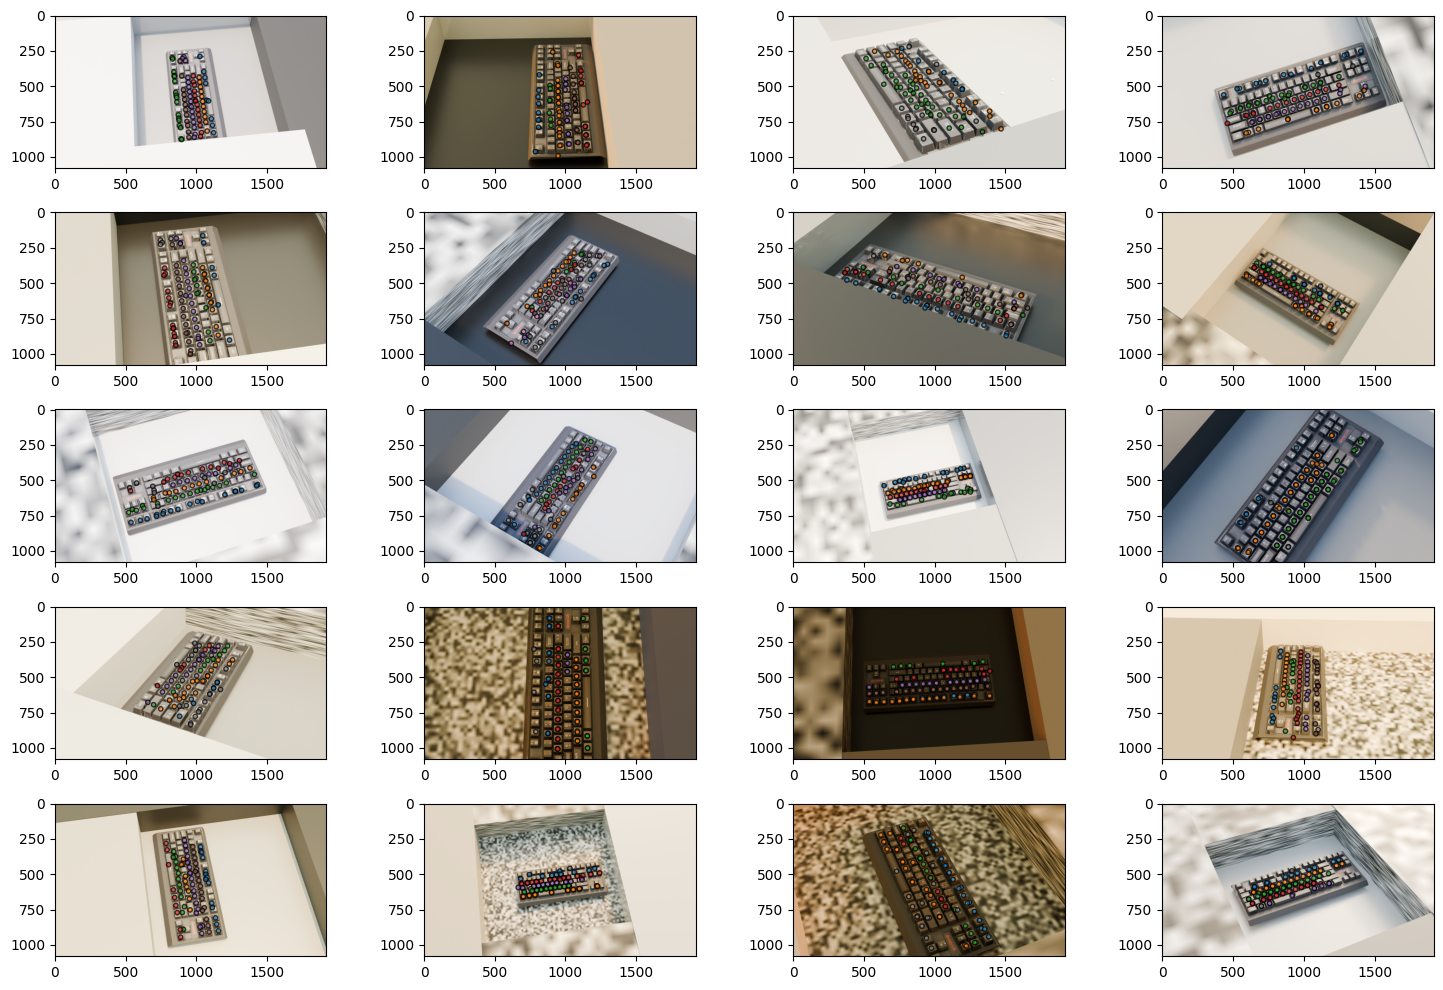

In [233]:
fig, axes =  plt.subplots(5,4, figsize = (15,10))

axes = axes.flatten()

for i in range(len(axes)):
    img_path = images[i]
    img =  Image.open(os.path.join("data", "final_renders", img_path))
    mask = Image.open(os.path.join("data", "final_renders", get_mask_for_image(img_path)))
    find_rows_img(np.array(img), np.array(mask), axes[i])

plt.tight_layout()
plt.show()